# Сборный проект №1

    
#### Цель: выявить определяющие успешность игры закономерности
#### Данные:

|Наименование|Описание|
|----|----|
|Name|название игры|
|Platform|платформа|
|Year_of_Release|год выпуска|
|Genre|жанр игры|
|NA_sales|продажи в Северной Америке (миллионы проданных копий)|
|EU_sales|продажи в Европе (миллионы проданных копий)|
|JP_sales|продажи в Японии (миллионы проданных копий)|
|Other_sales|продажи в других странах (миллионы проданных копий)|
|Critic_Score|оценка критиков (максимум 100)|
|User_Score|оценка пользователей (максимум 10)|
|Rating|рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.|

#### Этапы исследования
    
[Шаг 1. Откройте файл с данными и изучите общую информацию](#_step1)
    
[Шаг 2. Подготовьте данные](#_step2)
    
[Шаг 3. Проведите исследовательский анализ данных](#_step3)
    
[Шаг 4. Составьте портрет пользователя каждого региона](#_step4)
    
[Шаг 5. Проверьте гипотезы](#_step5)

  #### Выводы:
        
1) продажи имеют характерные временные интервалы
        
    1.1) в 1995 году объемы продаж скакнули и росли до 2008 года
    
    1.2) после 2008 года наблюдается падение продаж
    
    1.3) рейтинги er, rp встречаются мало раз, были исключены

2) пропущенные значения заменены на в ретинге заменим на "другое", так как они составляют 29% всех категорий, продажи заполнимм 0

3) суммарные продажи сильно скошены(из-за наличия сверхпопулярных игр, топ3 платформы по сумме продаж: x360, ps3, wii, жанр топ3: экшн, шутер, спорт)
        
4) Корреляция оценок и продаж в разрезе категорий (для некоторых категорий корреляции схожи, для некоторых - различны)

_рейтинг и платформа влияют на распределение пропорций продаж в регионах_   
        
|признак|категория|корреляция оценок пользователей и продаж|корреляция критиков пользователей и продаж|
|---|---|---|---|
|платформа|x360|0.23|0.43|
|платформа|wii|0.24|0.35|
|платформа|xone|-0.01|0.33|
|платформа|wiiu|0.24|0.33|
|платформа|ps3|0.21|0.41|
|платформа|3ds|-0.27|0.03|
|платформа|pc|-0.05|0.28|
|платформа|ps4|0.02|0.24|
|платформа|psv|-0.23|0.12|
|жанр|шутер|0.08|0.25|
|жанр|спорт|0.18|0.34|
|жанр|платформа|0.24|0.15|
|жанр|экшн|0.05|0.20|
|жанр|разное|0.23|0.41|
|жанр|файтинг|0.33|0.34|
|жанр|приключения|-0.03|0.03|
|жанр|ролевые_игры|-0.06|0.16|
|жанр|гонки|0.13|0.05|
|жанр|стратегии|-0.04|0.23|
|жанр|симулятор|0.01|0.00|
|рейтинг|m|0.08|0.25|
|рейтинг|t|0.03|0.15|
|рейтинг|e10+|0.07|0.25|
|рейтинг|другое|0.10|0.22|
|рейтинг|e|0.11|0.14|
        
5) В Японии струтура продаж игр по платформам отличается от общемировой структуры.(top1 - 3ds)
6) в Японии нет оценок Esrb, так как у них другой стандарт
   а также в японии на структуру продаж сильно влияет рейтинг

7) Проверка гипотез(h0(средние одинаковые)- нулевая, h1(средние разные)-альтернативная, alpha - уровень значимости)
        
* Оценки пользователей для xone vs pc одинаковые на уровне значимости 95%
* Оценки пользователей для экшн vs спорт разные на уровне значимости 95%

### Шаг 1. Откройте файл с данными и изучите общую информацию

<a id='_step1'></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib._color_data as mcd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook
from collections import defaultdict

from scipy import stats

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Шаг 2. Подготовьте данные

<a id='_step2'></a>

In [4]:
def _convert_types(df, print_report = True):
    ''' Преобразует типы данных '''
    df_c = df.copy()
    # проходим по каждой колонке
    for col in df_c.columns:
        try:
            # меняем тип на дату
            df_c[col] = df_c[col].astype('datetime64')
        except:            
            try:
                # приводим к инту, если возможно
                _val = df_c[col]
                _val_int = _val.astype(np.int32)
                if (_val == _val_int).all():
                    df_c[col] = df_c[col].astype('int')
                else:
                    df_c[col] = df_c[col].astype('float')
            except:
                try:
                    # bool --> float
                    df_c[col] = df_c[col].astype('float')
                except:
                    # удаляем пропуски, приводим к нижнему регистру
                    df_c[col] = df_c[col].str.lower().str.strip()
    if print_report:
        print('Отчет по типам данных\n')
        D_types = defaultdict(list)
        for k, v in df_c.dtypes.items():
            D_types[v].append(k)

        for k, v in D_types.items():
            print('Тип == {}. Колонки:'.format(k))
            for i, column in enumerate(v):
                print('\t{}) {}'.format(i+1, column))
            
            
    return df_c



In [5]:
df = pd.read_csv('/datasets/games.csv')

#### Шаг 2.1 Замените названия столбцов (приведите к нижнему регистру);

In [6]:
columns_rus_names_d = {'Name':'название_игры',
                       'Platform': 'платформа',
                       'Year_of_Release': 'год_релиз',
                       'Genre': 'жанр',
                       'NA_sales': 'продажи_сев_америка_млн',
                       'EU_sales': 'продажи_европа_млн',
                       'JP_sales':'продажи_япония_млн',
                       'Other_sales': 'продажи_другие_млн', 
                       'Critic_Score':'оценка_критиков',
                       'User_Score':'оценка_пользователей',
                       'Rating':'рейтинг'}

df = df.rename(columns = columns_rus_names_d)

unique_genres = df['жанр'].unique()[:-1]
genre_names_ru = ['спорт', 'платформа', 'гонки', 'ролевые_игры',\
                  'пазл', 'разное', 'шутер', 'симулятор', 'экшн',\
                  'файтинг', 'приключения', 'стратегии']
d_genre_names = dict(zip(unique_genres, genre_names_ru))
df['жанр'] = df['жанр'].map(d_genre_names)

#### Шаг 2.2 Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [7]:
df['оценка_пользователей'] = df['оценка_пользователей'].replace({'tbd':np.nan}).astype(np.float32)
df = _convert_types(df, print_report = True)

Отчет по типам данных

Тип == object. Колонки:
	1) название_игры
	2) платформа
	3) жанр
	4) рейтинг
Тип == float64. Колонки:
	1) год_релиз
	2) продажи_сев_америка_млн
	3) продажи_европа_млн
	4) продажи_япония_млн
	5) продажи_другие_млн
	6) оценка_критиков
	7) оценка_пользователей


#### Шаг 2.3 Обработайте пропуски при необходимости
* пропуски в названии игры, жанре удалим (2 шт)
* пропуски в оценках и рейтинге заполним как "другое"

In [8]:
def _nan_report(df):
    nan_agg = df.isna().agg({'mean', 'sum'}).T
    return nan_agg[(nan_agg!=0).all(1)]\
                .sort_values('sum', ascending = False)\
                .rename(columns = {'sum':'nan_всего', 'mean':'nan_доля'}).round(2)

In [9]:
_nan_report(df)

,nan_всего,nan_доля
оценка_пользователей,9125.0,0.55
оценка_критиков,8578.0,0.51
рейтинг,6766.0,0.40
год_релиз,269.0,0.02
название_игры,2.0,0.00
жанр,2.0,0.00


In [10]:
df.head()

,название_игры,платформа,год_релиз,жанр,продажи_сев_америка_млн,продажи_европа_млн,продажи_япония_млн,продажи_другие_млн,оценка_критиков,оценка_пользователей,рейтинг
0,wii sports,wii,2006.0,спорт,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985.0,платформа,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,гонки,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,спорт,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996.0,ролевые_игры,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
df = df.dropna(subset = ['название_игры', 'жанр'])

In [12]:
_nan_report(df)

,nan_всего,nan_доля
оценка_пользователей,9123.0,0.55
оценка_критиков,8576.0,0.51
рейтинг,6764.0,0.40
год_релиз,269.0,0.02


<div class="alert alert-block alert-info">

исправим масштаб оценок пользователей

</div>

In [13]:
df['оценка_пользователей']*=10

<div class="alert alert-block alert-info">

посчитаем общие продажи

</div>

In [14]:
sales_col= ['продажи_сев_америка_млн', 'продажи_европа_млн', 'продажи_япония_млн', 'продажи_другие_млн']

In [15]:
df['продажи_сумм']=df[sales_col].sum(1)

<div class="alert alert-block alert-info">

продажи с течением времени

</div>

<a id='_step3'></a>

### Шаг 3. Проведите исследовательский анализ данных

#### Шаг 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


<div class="alert alert-block alert-info">

1) в 1995 году объемы продаж скакнули и росли до 2008 года

2) после 2008 года наблюдается падение продаж

</div>

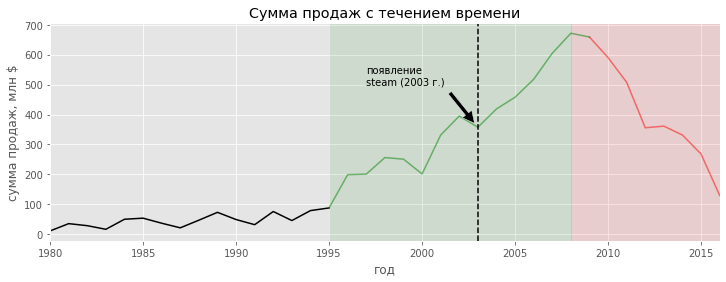

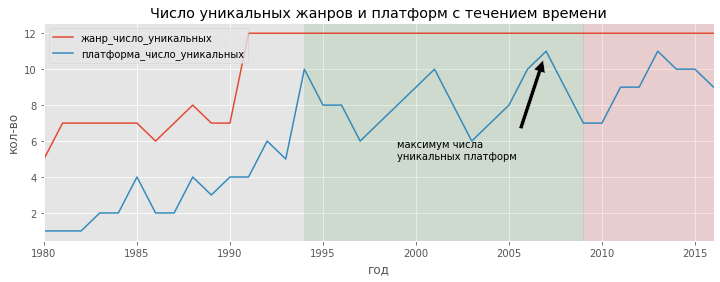

In [16]:
total_sales_by_year= df.groupby('год_релиз')['продажи_сумм'].sum()
total_sales_by_year.loc[total_sales_by_year.index<=1995].plot(figsize = (12, 4), color ='black')
total_sales_by_year.loc[(total_sales_by_year.index>=1995)&(total_sales_by_year.index<=2009)].plot(color ='green', alpha = .5)
total_sales_by_year.loc[(total_sales_by_year.index>=2009)].plot(color = 'red', alpha = .5)
plt.axvspan(1995,2008, alpha=0.1, color='green')
plt.axvspan(2008,2016, alpha=0.1, color='red')
plt.axvline(2003, linestyle ='--', color ='black')
plt.annotate('появление\nsteam (2003 г.)',xy=(2003,357), xytext=(1997, 500), arrowprops=dict(facecolor='black', shrink=0.1))
plt.title('Сумма продаж с течением времени')
plt.xlabel('год')
plt.ylabel('сумма продаж, млн $')

L_y = []
for _year in np.unique(df['год_релиз'].dropna()):
    nuniques = df[df['год_релиз'] == _year][['платформа', 'жанр']].nunique()
    L_y.append((_year, nuniques['жанр'], nuniques['платформа']))
    

nuniques_ts_df = pd.DataFrame.from_records(L_y).rename(columns = {0:'год_релиз', 1: 'жанр_число_уникальных',\
                                                                  2: 'платформа_число_уникальных'})\
                                               .set_index('год_релиз').sort_index()

nuniques_ts_df.plot(figsize = (12, 4))
plt.title('Число уникальных жанров и платформ с течением времени')
plt.xlabel('год')
plt.ylabel('кол-во')
plt.axvspan(1994,2009, alpha=0.1, color='green')
plt.axvspan(2009,2016, alpha=0.1, color='red')

plt.annotate('максимум числа\nуникальных платформ',xy=(nuniques_ts_df['платформа_число_уникальных'].idxmax(),\
                                                      nuniques_ts_df['платформа_число_уникальных'].max()),\
             xytext=(1999, 5), arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

#### Шаг 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [17]:
def _get_colors(labels1):
    colors_l1 = list(mcd.CSS4_COLORS.keys())[10: 10+len(labels1)]
    return colors_l1

In [18]:
sales_sum_by_year_platform_df = df.groupby(['год_релиз', 'платформа'])['продажи_сумм'].sum().unstack()
colors_plat = _get_colors(sales_sum_by_year_platform_df.columns)

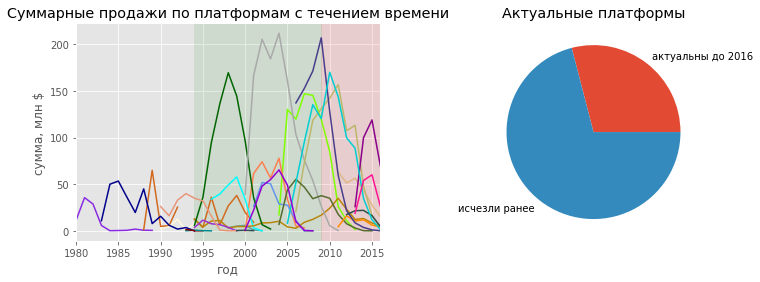

In [19]:
ax1 = plt.subplot(1, 2, 1)
for col, color in zip(sales_sum_by_year_platform_df.columns, colors_plat):
    sales_sum_by_year_platform_df[col].plot(ax = ax1, color = color, figsize = (12, 4))
plt.axvspan(1994,2009, alpha=0.1, color='green')
plt.axvspan(2009,2016, alpha=0.1, color='red')
plt.title('Суммарные продажи по платформам с течением времени')
plt.xlabel('год')
plt.ylabel('сумма, млн $')

maxyear = df['год_релиз'].max()
maxyear_platform = df.groupby('платформа')['год_релиз'].max()
platforms_to_use = maxyear_platform[maxyear_platform == maxyear].index
actual = (maxyear_platform == maxyear).mean()
not_actual = 1-actual
plt.subplot(1, 2, 2)

plt.pie((actual, not_actual), labels = ('актуальны до 2016', 'исчезли ранее'))
plt.title('Актуальные платформы')
plt.show()

<div class="alert alert-block alert-info">

1) возьмем данные с 2008 года(падение)

2) оставим только актуальные платформы: '3ds', 'pc', 'ps3', 'ps4', 'psv', 'wii', 'wiiu', 'x360', 'xone'

</div>

In [20]:
df = df[(df['год_релиз'] >= 2009) & (df['платформа'].isin(platforms_to_use)) & (~df['рейтинг'].isin(['ec', 'rp']))].reset_index(drop = True)

#### Шаг 3.3 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

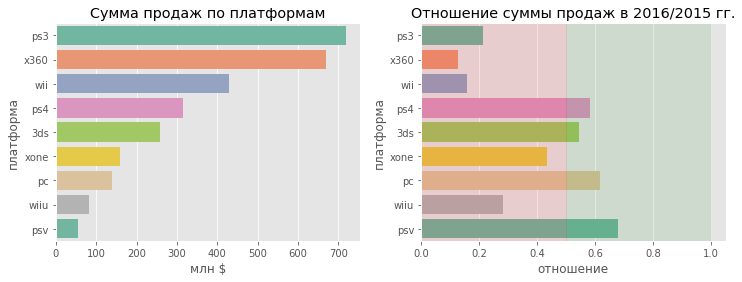

In [21]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
sales_by_plat_ser = df.groupby('платформа')['продажи_сумм'].sum().sort_values(ascending = False)
sns.barplot(y = sales_by_plat_ser.index, x = sales_by_plat_ser.values, orient = 'h', palette = 'Set2')   
plt.title('Сумма продаж по платформам')
plt.xlabel('млн $')

plt.subplot(1, 2, 2)
sales_by_plat_ser_2015_2016 = df.groupby('платформа').apply(lambda x: x[x['год_релиз'].isin([2016])]['продажи_сумм'].sum() /\
                                                                      x[x['год_релиз'].isin([2015])]['продажи_сумм'].sum())\
                                .loc[sales_by_plat_ser.index]
sns.barplot(y = sales_by_plat_ser_2015_2016.index, x = sales_by_plat_ser_2015_2016.values, orient = 'h', palette = 'Set2')   
plt.title('Отношение суммы продаж в 2016/2015 гг.')
plt.xlabel('отношение')
plt.axvspan(.5, 1, color = 'green', alpha = .1)
plt.axvspan(0, .5, color = 'red', alpha = .1)
plt.show()

<div class="alert alert-block alert-info">

1) самые прибыльные платформы - ps3, x360, wii

2) продажи в 2016 г. у этих платформ составляют не более 30 % от продаж в 2015 г.

</div>

#### Шаг 3.4 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [22]:
L_gn =[]
for _game_name, _subdf in tqdm_notebook(df.groupby('название_игры')):
    s = _subdf[sales_col].sum()
    L_gn.append((_game_name, _subdf['платформа'].unique()[0], _subdf['год_релиз'].unique()[0],\
              _subdf['жанр'].unique()[0], s['продажи_сев_америка_млн'],\
              s['продажи_европа_млн'], s['продажи_япония_млн'], s['продажи_другие_млн']))        
    
game_sales_df = pd.DataFrame.from_records(L_gn).rename(columns = {0:'название_игры', 1:'платформа', 2:'год_релиз',\
                                                               3:'жанр', 4:'продажи_сев_америка_млн', 5: 'продажи_европа_млн',\
                                                               6: 'продажи_япония_млн', 7: 'продажи_другие_млн'})
game_sales_df['продажи_всего'] = game_sales_df[sales_col].sum(1)    
game_sales_df = game_sales_df.sort_values('продажи_всего', ascending = False).reset_index(drop = True)

In [23]:
def _exclude_outliers(series):
    q25, q75 = series.dropna().quantile([.25, .75])
    iqr = q75-q25
    return (series>q25-1.5*iqr)&(series<q75+1.5*iqr)

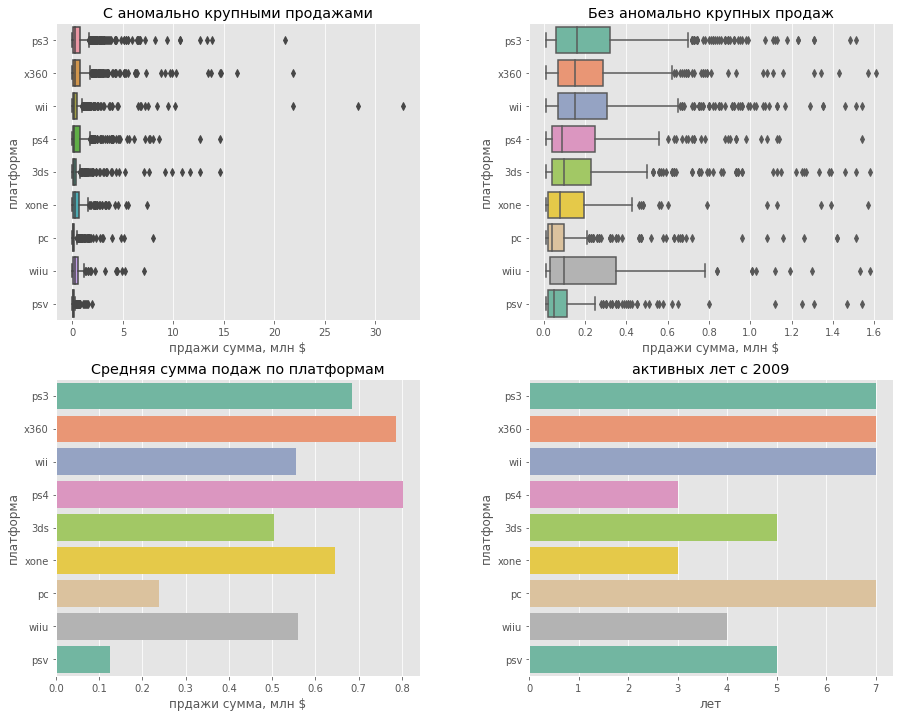

In [24]:
plt.figure(figsize = (15, 12))

plt.subplot(2, 2, 1)
sns.boxplot(data = df, y = 'платформа', x = 'продажи_сумм', orient = 'h', order = sales_by_plat_ser.index)
plt.title('С аномально крупными продажами')
plt.xlabel('прдажи сумма, млн $')

plt.subplot(2, 2, 2)
sns.boxplot(data = df[df['название_игры'].isin(game_sales_df[_exclude_outliers(game_sales_df['продажи_всего'])]\
                                                            ['название_игры'])],\
            y = 'платформа', x = 'продажи_сумм', orient = 'h', order = sales_by_plat_ser.index, palette = 'Set2')
plt.title('Без аномально крупных продаж')
plt.xlabel('прдажи сумма, млн $')

plt.subplot(2, 2, 3)
mean_sale_by_plat = df.groupby('платформа')['продажи_сумм'].mean()
sns.barplot(y = mean_sale_by_plat.index, x = mean_sale_by_plat.values, orient = 'h',\
            order = sales_by_plat_ser.index, palette = 'Set2')
plt.title('Средняя сумма подаж по платформам')
plt.xlabel('прдажи сумма, млн $')

plt.subplot(2, 2, 4)
age_plat = df.groupby('платформа')['год_релиз'].agg({'min', 'max'}).diff(axis = 1).abs()['min']
sns.barplot(y = age_plat.index, x = age_plat.values, orient = 'h',\
            order = sales_by_plat_ser.index, palette = 'Set2')
plt.title('активных лет с 2009')
plt.xlabel('лет')
plt.subplots_adjust(wspace = .3)

<div class="alert alert-block alert-info">

* топ3 платформ по стоимости игр: ps4, x360, ps3
* суммы продаж на платформах сильно скошены (из-за популярности отдельных игр)

</div>

#### Шаг 3.5 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [25]:
df_no_outliers = df[df['название_игры'].isin(game_sales_df[_exclude_outliers(game_sales_df['продажи_всего'])]\
                            ['название_игры'])]

In [26]:
ratings_col = ['оценка_критиков', 'оценка_пользователей']
df_ratings = df_no_outliers[ratings_col].dropna().round().astype(int)

In [27]:
df_ratings['платформа'] = df.loc[df_ratings.index, 'платформа']
df_ratings['жанр'] = df.loc[df_ratings.index, 'жанр']
df_ratings['рейтинг'] = df.loc[df_ratings.index, 'рейтинг']

df_ratings['платформа'] = df.loc[df_ratings.index, 'платформа']
df_ratings['продажи_сумм'] = df.loc[df_ratings.index, 'продажи_сумм']

ПЛАТФОРМА
----------------------------------------------------------------


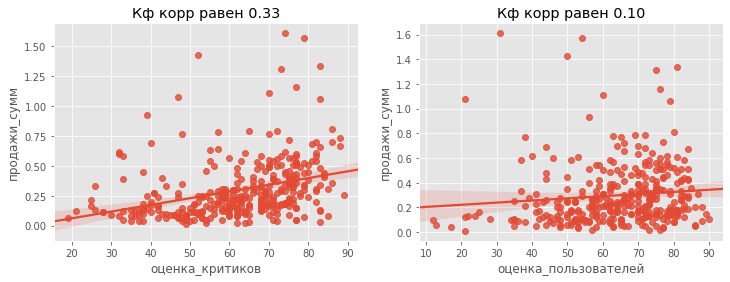

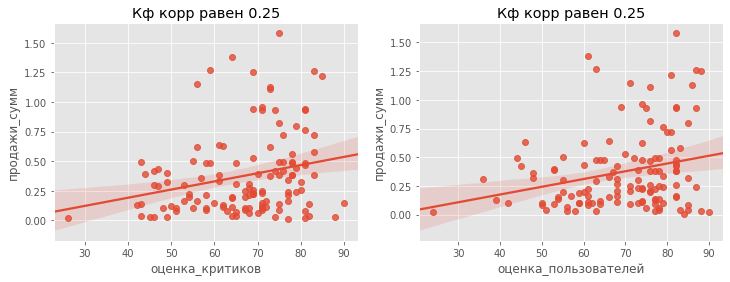

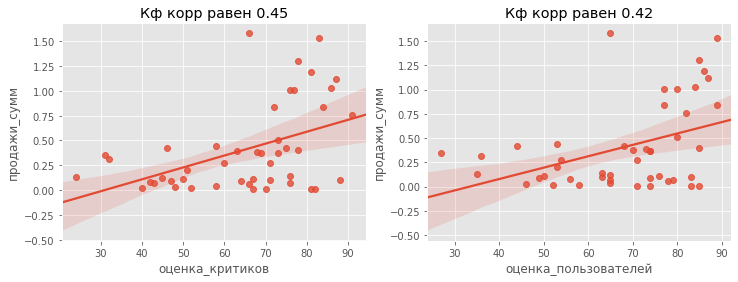

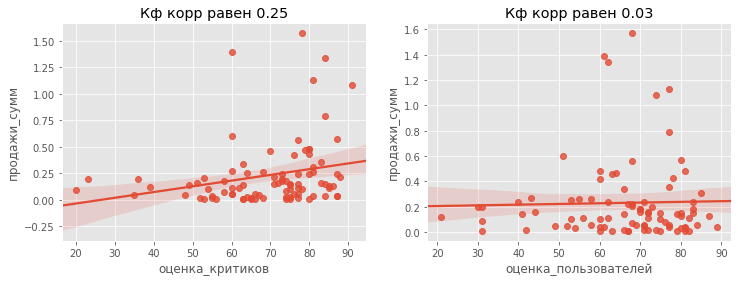

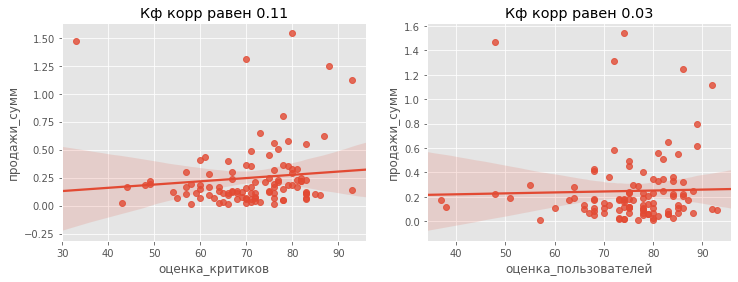

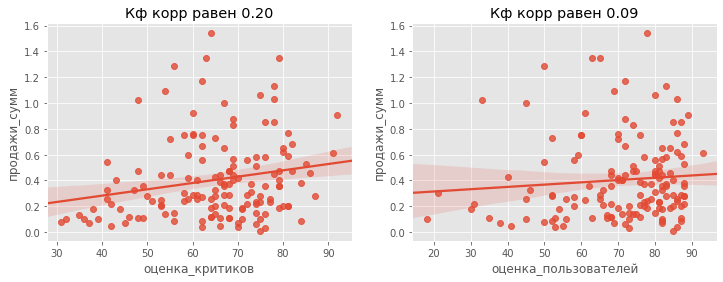

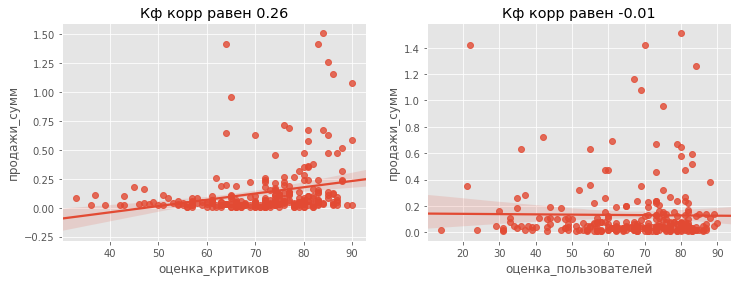

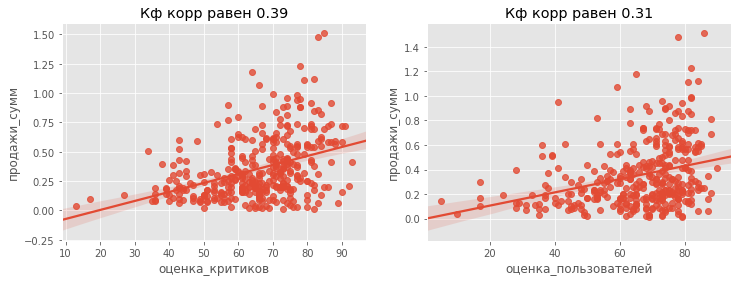

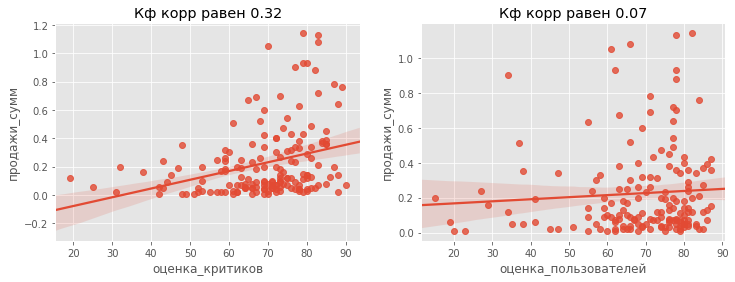

ЖАНР
----------------------------------------------------------------


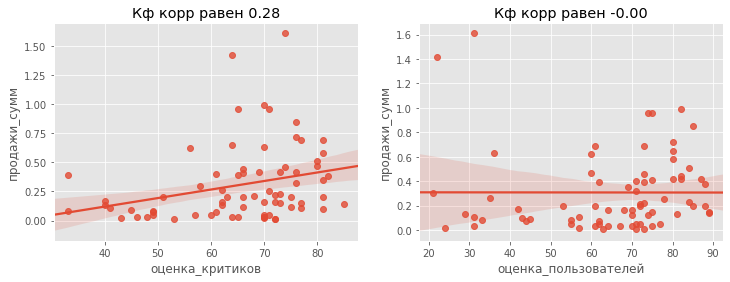

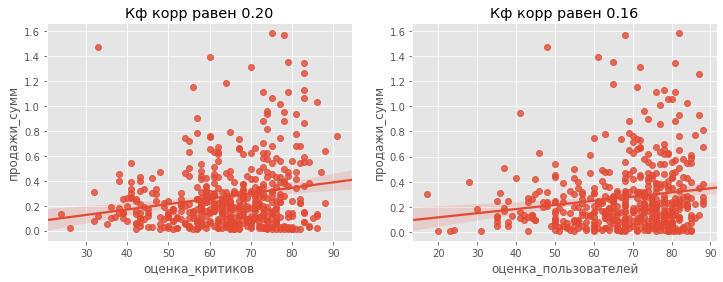

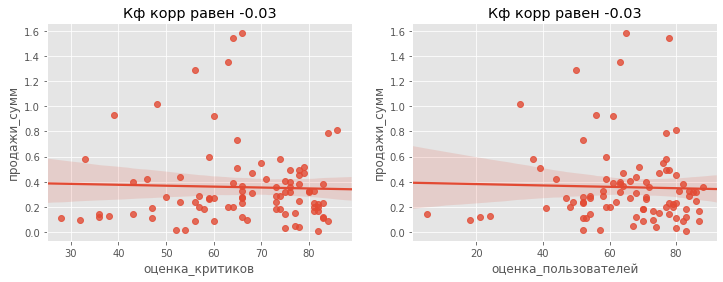

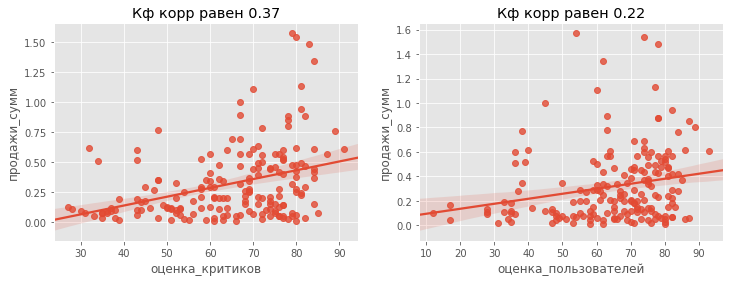

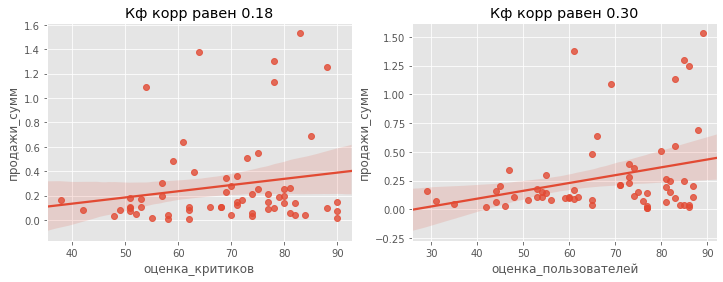

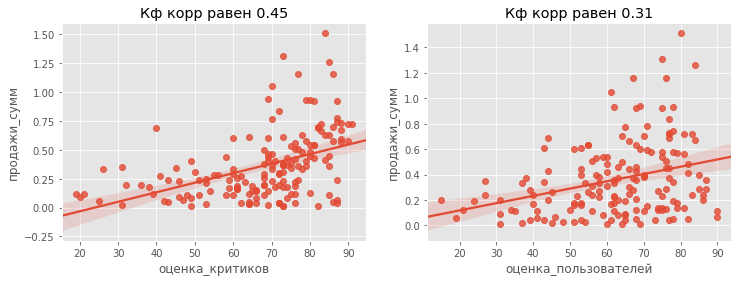

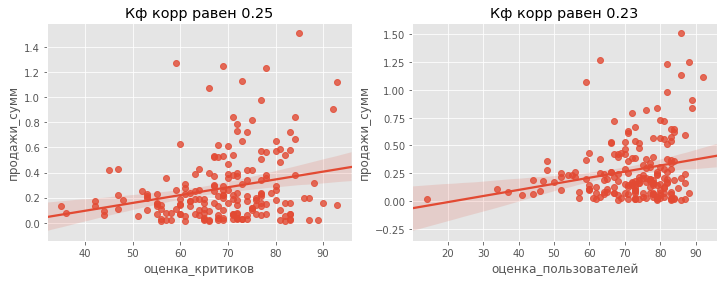

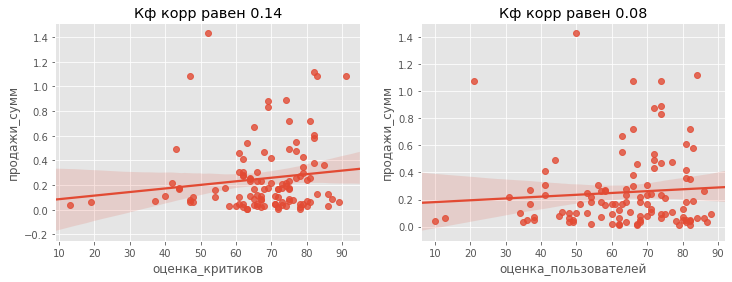

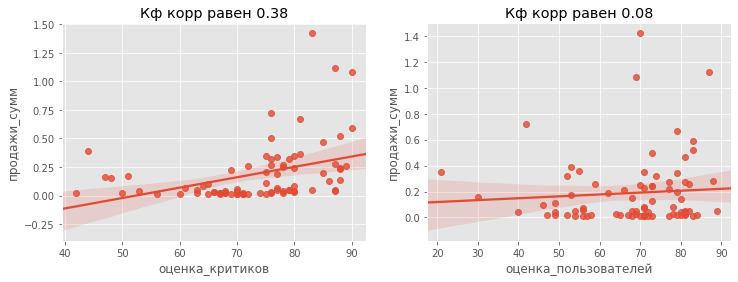

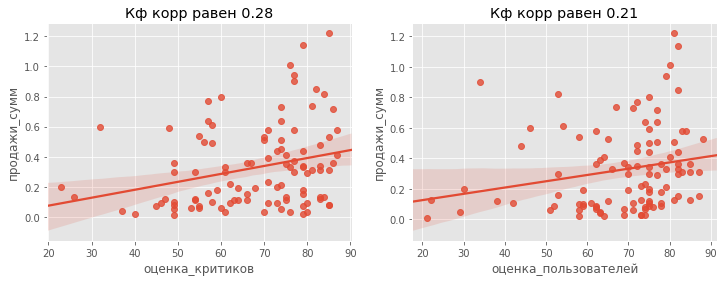

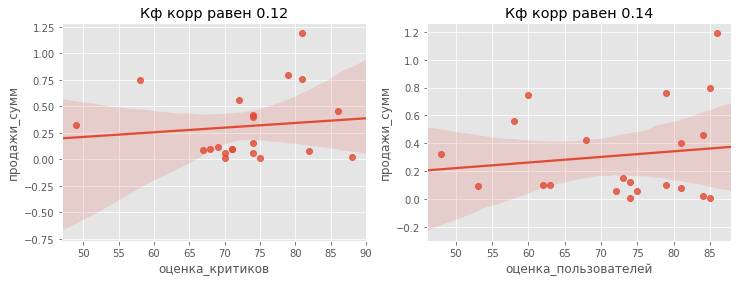

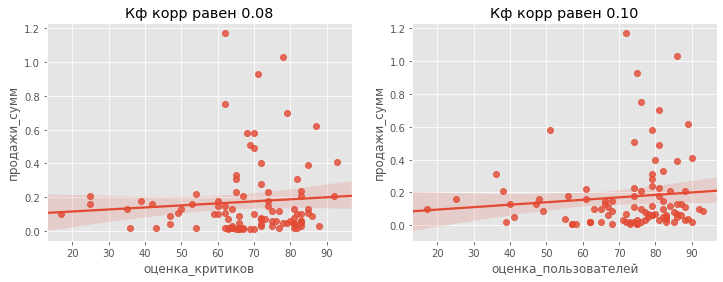

РЕЙТИНГ
----------------------------------------------------------------


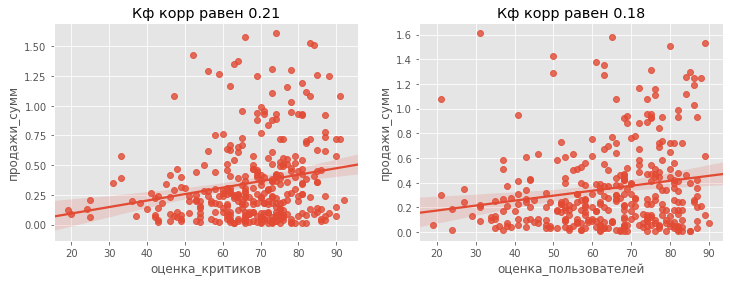

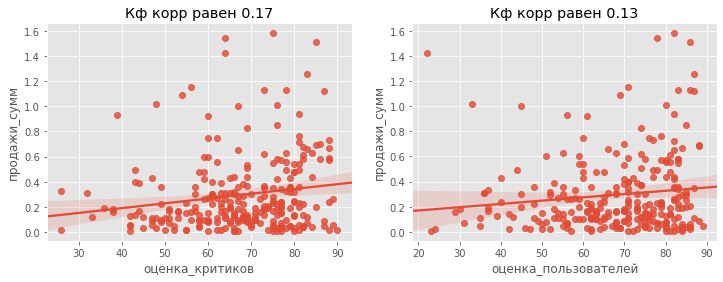

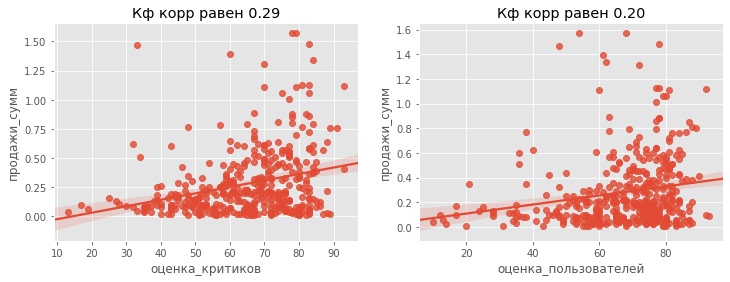

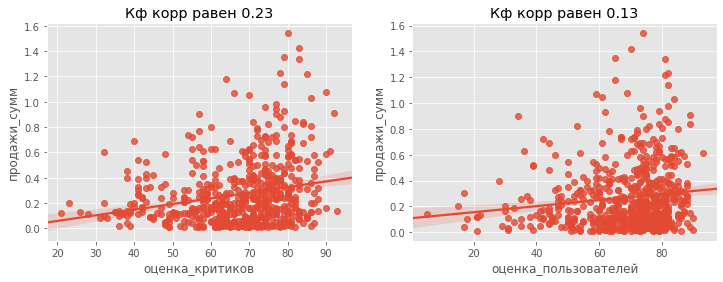

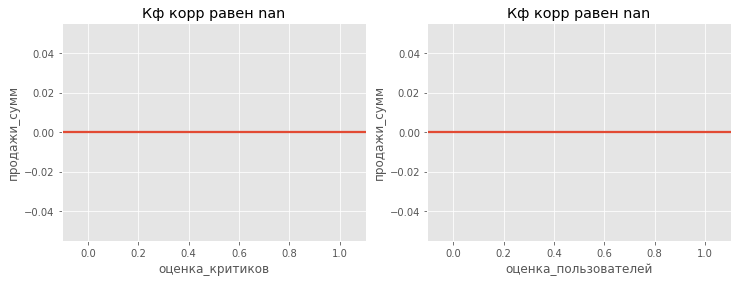

In [28]:
L_corr= []
for x in ('платформа', 'жанр', 'рейтинг'):
    print(str.upper(x))
    print('----------------------------------------------------------------')
    for platform in df_ratings[x].unique():
        _subdf = df_ratings[df_ratings[x] == platform]
        plt.figure(figsize =(12,4))
        plt.subplot(1, 2, 1)
        sns.regplot(_subdf['оценка_критиков'], _subdf['продажи_сумм'])
        corr1=_subdf[['оценка_критиков']].corrwith(_subdf['продажи_сумм']).values[0]
        plt.title('Кф корр равен {:.2f}'.format(corr1))
        plt.subplot(1, 2, 2)
        sns.regplot(_subdf['оценка_пользователей'], _subdf['продажи_сумм'])
        corr2=_subdf[['оценка_пользователей']].corrwith(_subdf['продажи_сумм']).values[0]
        plt.title('Кф корр равен {:.2f}'.format(corr2))
        plt.show()

        L_corr.append((x, platform, corr1, corr2))

In [29]:
ratings_report = pd.DataFrame.from_records(L_corr)
ratings_report.columns = ['название_признака', 'категория', 'корр продаж и оценок критиков', 'корр продаж и оценок пользователей']
ratings_report = ratings_report.loc[ratings_report.iloc[:, -2:].abs().max(1).sort_values(ascending = False).index]\
                               .reset_index(drop = True)\
                               .set_index(['название_признака', 'категория'])

In [30]:
def color_negative_red(val):    
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

ratings_report.dropna().style.applymap(color_negative_red)

In [31]:
rating_diff = ratings_report.dropna().diff(axis = 1)['корр продаж и оценок пользователей']

In [32]:
rating_diff.loc[rating_diff.abs().sort_values(ascending = False).index].to_frame('оценки_крит_пол_разница').style.applymap(color_negative_red)


<div class="alert alert-block alert-info">

Корреляция оценок критиков/пользователей и суммы продаж (без выбросов)

* продажи  wiiu примерно одинково сильно коррелируют с оценками как критиков, так и пользователей
* оценки критиков и пользователей сильнее всего расходятся в разрезе жанров
    
</div>

#### Шаг 3.6 Соотнесите выводы с продажами игр на других платформах.
#### Шаг 3.7 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


In [33]:
def _stacked_bars(sales_by_region_platform, **kwargs):  
    sales_by_region_platform = sales_by_region_platform.loc[sales_by_region_platform.sum(1).sort_values(ascending = False).index]
    ax = sales_by_region_platform.plot(kind ='bar', stacked = True, **kwargs)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                    y+height/2, 
                    '{:.1}'.format(height), 
                    horizontalalignment='center', 
                    verticalalignment='center')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    plt.ylabel('доли, сумма')    

ПЛАТФОРМА в порядке убывания суммы продаж в регионе

	1) продажи_сев_америка_млн | топ5: ['x360', 'ps3', 'wii', 'ps4', 'xone']
	2) продажи_европа_млн | топ5: ['ps3', 'x360', 'ps4', 'wii', 'pc']
	3) продажи_япония_млн | топ5: ['3ds', 'ps3', 'wii', 'psv', 'ps4']
	4) продажи_другие_млн | топ5: ['ps3', 'x360', 'ps4', 'wii', 'pc']
--------------------------------------------------------------------------------------------


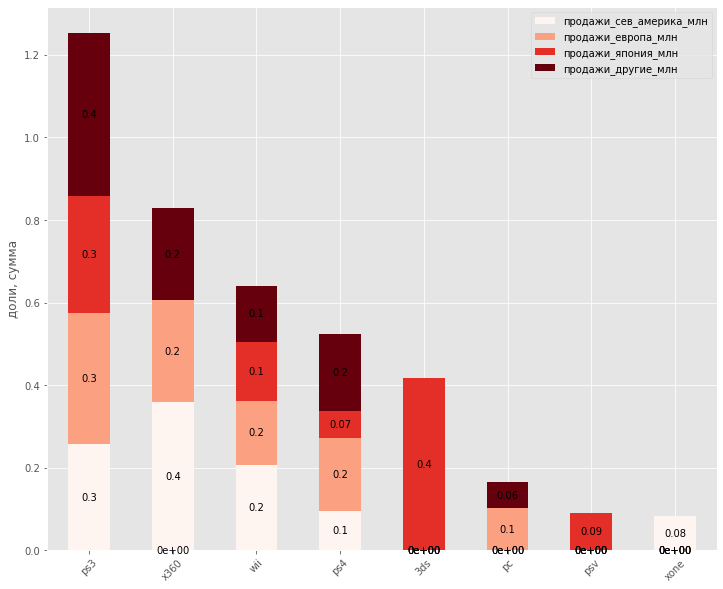

ЖАНР в порядке убывания суммы продаж в регионе

	1) продажи_сев_америка_млн | топ5: ['экшн', 'шутер', 'спорт', 'разное', 'ролевые_игры']
	2) продажи_европа_млн | топ5: ['экшн', 'шутер', 'спорт', 'разное', 'ролевые_игры']
	3) продажи_япония_млн | топ5: ['ролевые_игры', 'экшн', 'платформа', 'разное', 'спорт']
	4) продажи_другие_млн | топ5: ['экшн', 'шутер', 'спорт', 'разное', 'ролевые_игры']
--------------------------------------------------------------------------------------------


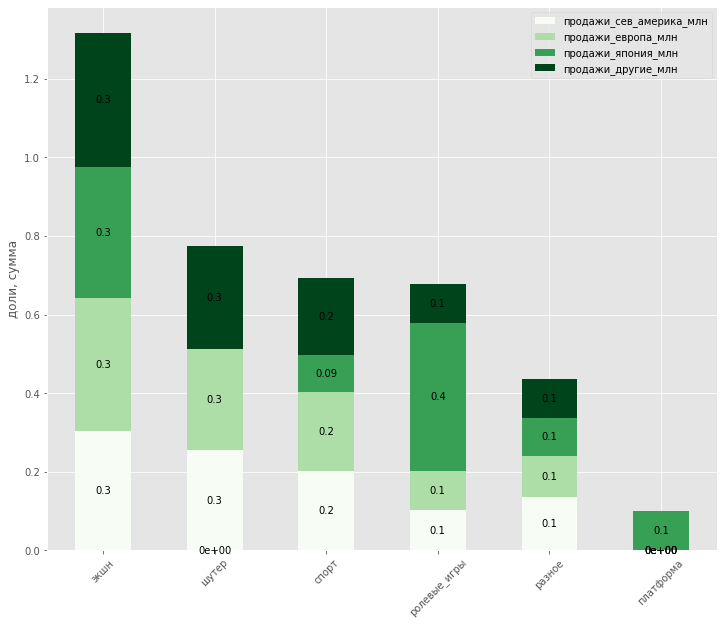

РЕЙТИНГ в порядке убывания суммы продаж в регионе

	1) продажи_сев_америка_млн | топ5: ['m', 'e', 't', 'e10+']
	2) продажи_европа_млн | топ5: ['m', 'e', 't', 'e10+']
	3) продажи_япония_млн | топ5: ['e', 't', 'm', 'e10+']
	4) продажи_другие_млн | топ5: ['m', 'e', 't', 'e10+']
--------------------------------------------------------------------------------------------


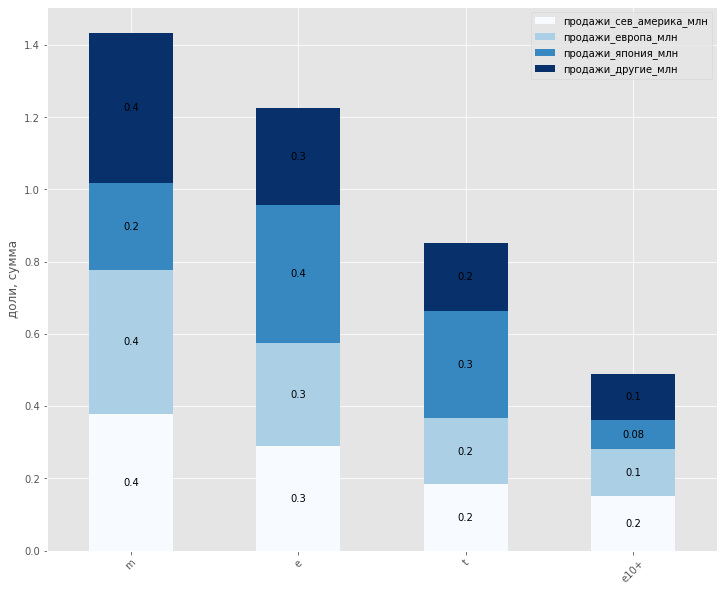

In [34]:
for col1, color in zip(('платформа', 'жанр', 'рейтинг'),\
                       ('Reds', 'Greens', 'Blues')):
    orders = {}
    L = []
    for col in sales_col:
        ser = df.groupby(col1)[col].sum().sort_values(ascending = False).head()
        L.append(ser)
        orders[col] = ser.index.tolist() 
    L_df = pd.concat(L, 1)
    L_df = L_df.apply(lambda x: x / x.sum()).fillna(0)

    print('{} в порядке убывания суммы продаж в регионе\n'.format(str.upper(col1)))
    for i, (k, v) in enumerate(orders.items()):
        print('\t{}) {} | топ5: {}'.format(i+1, k, v))
    print('--------------------------------------------------------------------------------------------')
    _stacked_bars(L_df, colormap = color, figsize = (12, 10))
    plt.show()

<a id='_step4'></a>

#### Шаг 4. Составьте портрет пользователя каждого региона

ПЛАТФОРМА
------------------------------------------


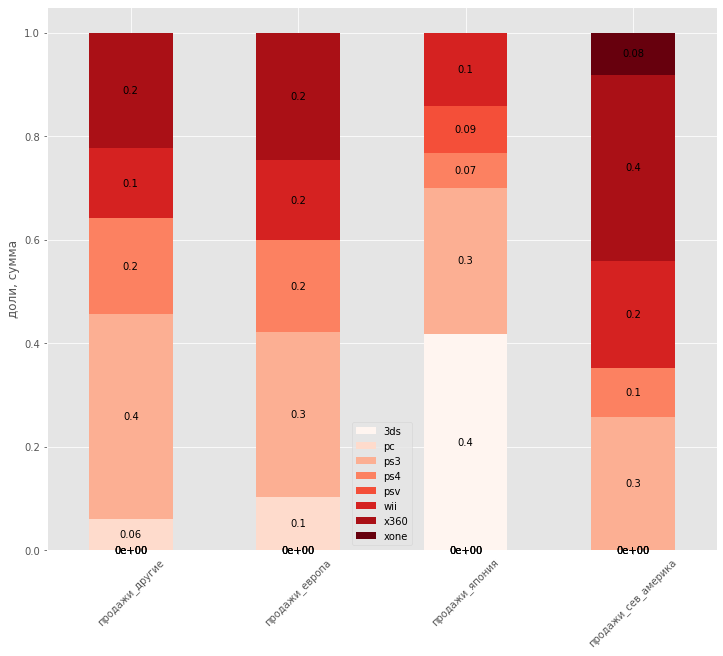

ЖАНР
------------------------------------------


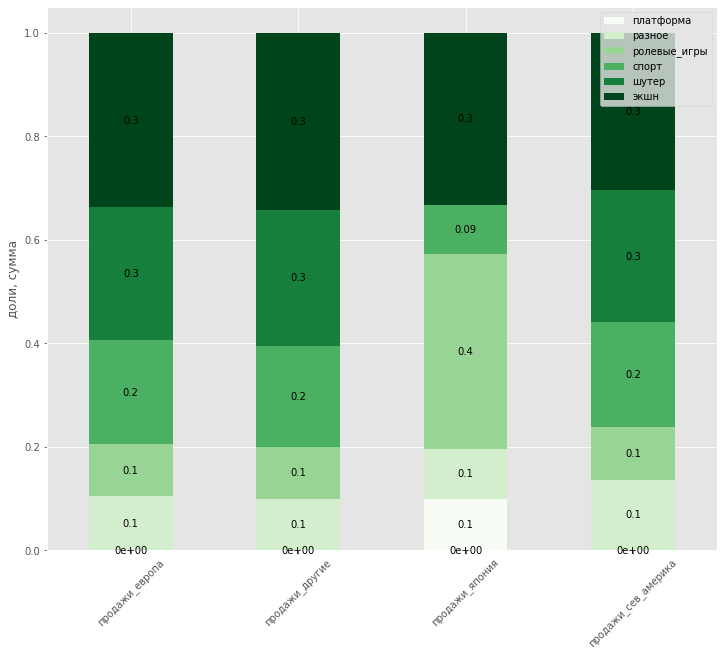

РЕЙТИНГ
------------------------------------------


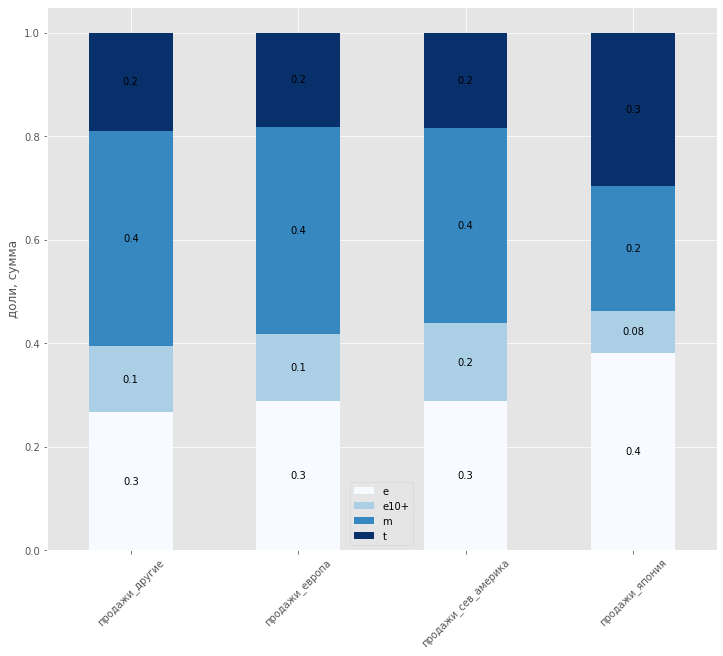

In [35]:
for by, color in zip(('платформа', 'жанр', 'рейтинг'), ('Reds', 'Greens', 'Blues')):
    print(str.upper(by))
    print('------------------------------------------')
    L_top5 = []
    for col in sales_col:    
        ser = df.groupby(by)[col].sum().sort_values(ascending = False).head()
        L_top5.append((ser / ser.sum()).to_frame(col[:-4]))
    sb = pd.concat(L_top5, 1).fillna(0).T
    _stacked_bars(sb, colormap = color, figsize = (12, 10))
    plt.show()

<div class="alert alert-block alert-info">

* в Японии не продают x360, продают только 3ds
* предпочтения разнятся от региона к региону в разрезе платформ, жанров, рейтингу(чаще всего)
* экшн одинково продается в регионах, имея самую большую прибыль
* хуже всего продается платформа, имея продажи только в японии
* доли продаж для рейтинга e10+, отсутствия в японии отличаются от долей в других регионах
    
</div>

<a id='_step5'></a>

#### Шаг 5. Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [36]:
def _compare_means_in_two_groups(sample1, sample2, alpha):
    
    h0 = 'Средние в двух группах равны'
    h1 = 'Средние в двух группах не равны'
        
    print('Тестируем выборку на нормальность | alpha == {}'.format(alpha))
    test1 = stats.normaltest(sample1)[1] < alpha
    test2= stats.normaltest(sample2)[1] < alpha

    if test1:
        print('\tВыборка 1 нормальная')
    else:
        print('\tВыборка 1 ненормальная')    

    if test2:
        print('\tВыборка 2 нормальная')
    else:
        print('\tВыборка 2 ненормальная')

    if test1 & test2:
        print('Применяем тест Стьюдента')
        if stats.ttest_ind(sample1, sample2, equal_var=False)[1] < alpha:
            print('\tВывод: Средние одинаковые на уровне значимости {:.0%}'.format(1-alpha))
        else:
            print('\tВывод: Средние разные на уровне значимости {:.0%}'.format(1-alpha))
    else:
        print('Применяем bootstrap')
        res=[]
        for _ in range(1000): 
            low1, high1 = np.percentile(np.mean(np.random.choice(sample1, (100, 100)), 1), [alpha/1, 1- alpha/2])
            low2, high2 = np.percentile(np.mean(np.random.choice(sample2, (100, 100)), 1), [alpha/1, 1- alpha/2])
            if not ((low1<low2) & (high1<low2)) | ((low2<low1) & (high2<low1)):
                r = '\tВывод: Средние одинаковые на уровне значимсти {:.0%}'.format(1-alpha)
            else:
                r = '\tВывод: Средние разные на уровне значимсти {:.0%}'.format(1-alpha)
            res.append(r)
        print(pd.Series(res).value_counts().idxmax())

* проверяем на нормальность
* применяем тест стьюдента, если распределение нормальное
* применяем бутстреп, если другое
* h0: средние в двух группах равны
* h1: средние в двух группах разные
* alpha - уровень значимости (вероятность того, что статистика критерия примет значение меньше alpha при условии, что h0 верна)

In [37]:
print('\tОценки пользователей для xone vs pc\n----------------------------------------------------------------')
sample1 = df[df['платформа'] == 'xone']['оценка_пользователей'].dropna()
sample2 = df[df['платформа'] == 'pc']['оценка_пользователей'].dropna()
_compare_means_in_two_groups(sample1, sample2, alpha=.05)

	Оценки пользователей для xone vs pc
----------------------------------------------------------------
Тестируем выборку на нормальность | alpha == 0.05
	Выборка 1 нормальная
	Выборка 2 нормальная
Применяем тест Стьюдента
	Вывод: Средние разные на уровне значимости 95%


In [38]:
print('\tОценки пользователей для экшн vs спорт\n----------------------------------------------------------------')
sample3 = df[df['жанр'] == 'экшн']['оценка_пользователей'].dropna()
sample4 = df[df['жанр'] == 'спорт']['оценка_пользователей'].dropna()
_compare_means_in_two_groups(sample3, sample4, alpha=.05)

	Оценки пользователей для экшн vs спорт
----------------------------------------------------------------
Тестируем выборку на нормальность | alpha == 0.05
	Выборка 1 нормальная
	Выборка 2 нормальная
Применяем тест Стьюдента
	Вывод: Средние одинаковые на уровне значимости 95%
